# Model Development: Titanic-Spaceship <span style="color:orange">**Competition**</span>
<img src="../assets/spaceship-pic.jpg" alt="Title-Pic">

# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
from pandas import Series, DataFrame
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


np.set_printoptions(suppress=True)
sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})

# Data

In [4]:
MODEL_DATA = np.load("../model_data/titanic_spaceship_prep_data1.npz", allow_pickle=True)
inputs = MODEL_DATA["inputs"]
targets = MODEL_DATA["targets"]
DATA_COLUMN_NAMES = MODEL_DATA["input_column_names"]

X_train, X_tmp_test, y_train, y_tmp_test = train_test_split(inputs, targets, test_size=0.2, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_tmp_test, y_tmp_test, test_size=0.5, random_state=101)

(X_train.shape, X_test.shape, X_val.shape), (y_train.shape, y_test.shape, y_val.shape)

(((7004, 22), (876, 22), (876, 22)), ((7004,), (876,), (876,)))

# Helper Functions

In [5]:
def export_model(model, model_name):
    timestamp_string = str(datetime.now())[:19].replace(" ", "").replace(":", "").replace("-", "")
    export_path = f"../trained_models/{timestamp_string}_{model_name}"
    with open(export_path, "wb") as model_file:
        pickle.dump(model, model_file)
    
    return export_path

In [6]:
def load_model(model_path):
    with open(model_path, "rb") as model_file:
        return pickle.load(model_file)

In [7]:
def print_top_rankings(model, top=10):
    sorted_zipped_report = sorted(
        zip(
            model.cv_results_["params"], 
            model.cv_results_["mean_test_score"], 
            model.cv_results_["rank_test_score"]
        ), key=lambda item: item[2]
    )
    for (i, (params, score, rank)) in enumerate(sorted_zipped_report):
        if i >= top:
            break

        print(f"Rank: {rank}\tScore: {score}\nParam: {params}\n")
        

In [8]:
def print_model_classification_report(model, X_data, y_data):
    preds_test = model.predict(X_data)
    preds_train = model.predict(X_train)

    f1_score_test = f1_score(y_data, preds_test, average="macro")
    accuracy_score_test = accuracy_score(y_data, preds_test)
    f1_score_train = f1_score(y_train, preds_train, average="macro")
    accuracy_score_train = accuracy_score(y_train, preds_train)

    print(f"Accuracy:\t{f1_score_test}\t|\tTrain-Accuracy:\t{accuracy_score_train}")
    print(f"F1-Score:\t{accuracy_score_test}\t|\tTrain-F1-Score:\t{f1_score_train}\n")
    print(classification_report(y_data, preds_test))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_data, preds_test), annot=True, cmap="cool", fmt='.5g')


In [9]:
def print_feature_importance(model):
    return Series(data=model.feature_importances_, index=DATA_COLUMN_NAMES).sort_values(ascending=False)

# Build the Model

## Model1: XXXXXXXXXX

In [11]:
xgb_model = XGBClassifier(nthread=-1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

Accuracy:	0.7956170889994487	|	Train-Accuracy:	0.8783552255853798
F1-Score:	0.795662100456621	|	Train-F1-Score:	0.87823942202061

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       441
         1.0       0.78      0.82      0.80       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



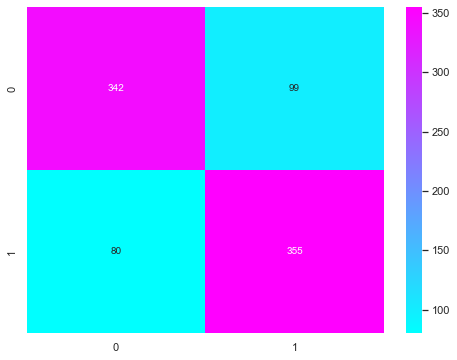

In [12]:
print_model_classification_report(xgb_model, X_test, y_test)

In [13]:
print_feature_importance(xgb_model)

CryoSleep                    0.672317
HomePlanet_Earth             0.107040
HomePlanet_Europa            0.037244
Cabin_E                      0.025908
VRDeck                       0.015344
Spa                          0.014418
RoomService                  0.013290
FoodCourt                    0.013029
ShoppingMall                 0.012214
HomePlanet_Mars              0.012086
Cabin_C                      0.010278
Destination_PSO J318.5-22    0.007741
Cabin_F                      0.007719
Age                          0.007672
VIP                          0.007379
Destination_TRAPPIST-1e      0.006788
Cabin_B                      0.006348
Cabin_G                      0.006149
Destination_55 Cancri e      0.006090
Cabin_D                      0.006039
Cabin_A                      0.004906
Cabin_T                      0.000000
dtype: float32

## Model2: XXXXXXXXXX

Accuracy:	0.7908666923232467	|	Train-Accuracy:	0.7879782981153627
F1-Score:	0.791095890410959	|	Train-F1-Score:	0.7878397253588678

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       441
         1.0       0.81      0.76      0.78       435

    accuracy                           0.79       876
   macro avg       0.79      0.79      0.79       876
weighted avg       0.79      0.79      0.79       876



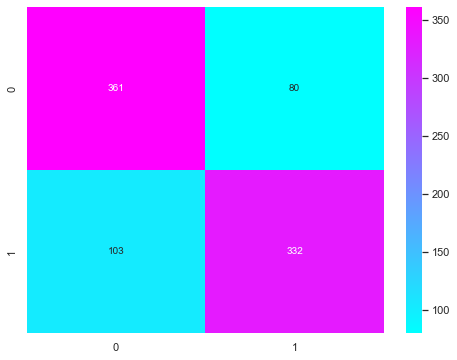

In [53]:
knn_model = KNeighborsClassifier(30) #30 -> 79,09
knn_model.fit(X_train, y_train)
print_model_classification_report(knn_model, X_test, y_test)

## RF

Accuracy:	0.81392087845067	|	Train-Accuracy:	0.9161907481439178
F1-Score:	0.8139269406392694	|	Train-F1-Score:	0.9160008717517476

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81       441
         1.0       0.81      0.81      0.81       435

    accuracy                           0.81       876
   macro avg       0.81      0.81      0.81       876
weighted avg       0.81      0.81      0.81       876



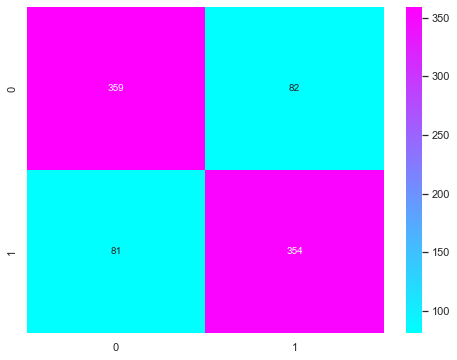

In [80]:
rf_model = RandomForestClassifier(n_estimators=320, random_state=101) # 320|400 -> 81,39  |  70|500 -> 81,05
rf_model.fit(X_train, y_train)
print_model_classification_report(rf_model, X_test, y_test)

Accuracy:	0.7887133889167748	|	Train-Accuracy:	0.7965448315248429
F1-Score:	0.7888127853881278	|	Train-F1-Score:	0.7962955785504982

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78       441
         1.0       0.77      0.82      0.79       435

    accuracy                           0.79       876
   macro avg       0.79      0.79      0.79       876
weighted avg       0.79      0.79      0.79       876



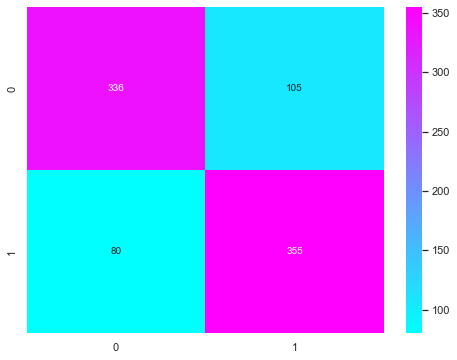

In [81]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print_model_classification_report(svm_model, X_test, y_test)

Accuracy:	0.7469885658947655	|	Train-Accuracy:	0.9161907481439178
F1-Score:	0.747716894977169	|	Train-F1-Score:	0.91602730648266

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       441
         1.0       0.72      0.81      0.76       435

    accuracy                           0.75       876
   macro avg       0.75      0.75      0.75       876
weighted avg       0.75      0.75      0.75       876



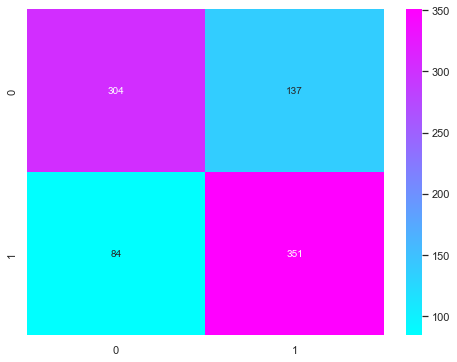

In [82]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print_model_classification_report(dt_model, X_test, y_test)

# Final Model Selection

# Export the Model